In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import normalize as NS
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

In [376]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [377]:
dataframe = pd.read_csv("Data/Salary_Data.csv")

In [378]:
dataframe.sample()

,YearsExperience,Salary
27,9.6,112635.0


In [379]:
dataframe.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [380]:
(dataframe==0).sum()

YearsExperience    0
Salary             0
dtype: int64

In [381]:
print(preprocess_obj.duplicates_count(dataframe))

0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca77d178d0>,
      dtype=object)

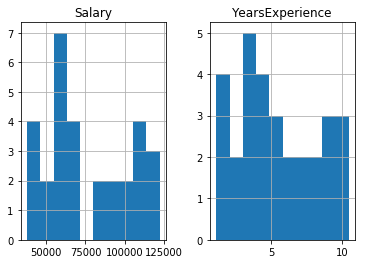

In [382]:
dataframe.hist()

In [383]:
Y_train = dataframe['Salary']

In [384]:
traindata = dataframe.drop('Salary', axis=1)

In [385]:
traindata, test_data, Y_train,  Y_test = train_test_split(traindata,Y_train,test_size = 0.3, random_state=0)

In [386]:
linear_reg = LinearRegression(normalize=True)

In [387]:
linear_reg.fit(traindata,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [388]:
Ypred = linear_reg.predict(test_data)

In [389]:
error = preprocess_obj.root_mean_square(Ypred,Y_test)
print("Accuracy = ",(1-error)*100)

Accuracy =  -161042.0312120576


In [390]:
mae(Ypred,Y_test)

3737.4178618788987